# Non-prametric density estimation

In this part, we are going to implement below non-parametric estimstion methods:

* Histogram
* Parzen Window
* Gaussian kernel (Standard Deviations of 0.2,0.6,0.9)
* KNN Estimator (Fork=1,9,99)

Firstly, let's create our dataset.

In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

In [2]:
# dataset creation

class DatasetGD():
    """
    if split_test_train == True:
        access data by "x_train", "y_train", "x_test", "y_test"
    else:
        access data by "x", "y"
    """
    def __init__(self, num_of_samples, mean, covariance, num_of_classes, 
                 shuffle=True, split_test_train=True, test_size=0.2):
        self.num_of_samples = num_of_samples
        self.mean = mean
        self.covariance = covariance
        self.num_of_classes = num_of_classes
        
        self.generate_dataset(num_of_samples, mean, covariance, num_of_classes)
        
        # split test train dataset
        if split_test_train == True:
            self.split(shuffle, test_size)   
            
    def split(self, shuffle, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=test_size, shuffle=shuffle)
    
    def generate_dataset(self, num_of_samples, mean, covariance, num_of_classes, seed=1000):
        x_data = []        
        y_data = []
        for i in range(self.num_of_classes):
            self.mvd = multivariate_normal(cov = covariance[i], mean = mean[i], seed = seed)
            
            # generating 500 samples out of the distribution
            x_tmp = self.mvd.rvs(size = num_of_samples)
            y_tmp = np.array([i]*self.num_of_samples)
        
            x_data.append(x_tmp)
            y_data.append(y_tmp)
        
        # concatenate all x_datas and y_datas
        self.x = list(x_data[0]) + list(x_data[1]) + list(x_data[2])
        self.y = list(y_data[0]) + list(y_data[1]) + list(y_data[2])
        self.x = np.array(self.x)
        self.y = np.array(self.y).reshape(-1, 1)
        
    def plot_dataset(self, x_in, y_in):
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        x_ = pd.DataFrame(data=x_in, columns=["x1", "x2"])
        y = pd.DataFrame(data=y_in, columns=["y"])

        res = pd.concat([x_, y], axis=1, sort=False)
        class_0 = res[res['y'] == 0]
        class_1 = res[res['y'] == 1]
        class_2 = res[res['y'] == 2]

        ax2.scatter(class_0.iloc[:,0], class_0.iloc[:, 1], s=10, label='class-0', c='#64B952')
        ax2.scatter(class_1.iloc[:,0], class_1.iloc[:, 1], s=10, label='class-1', c='#8678AC')
        ax2.scatter(class_2.iloc[:,0], class_2.iloc[:, 1], s=10, label='class-2', c='#FF5300')
        ax2.set_title("Dataset Scatter Plot")
    
    def calculate_cov(self, x, y, mean_MLE):
        self.n = len(self.covariance[0])
        list_cov = []
        for class_ in range(self.num_of_classes):
            cov_ = np.zeros((self.n, self.n))
            count_ = 0
            for i in range(x.shape[0]):
                if int(y[i]) == class_:
                    temp = x[i] - mean_MLE[int(y[i])].reshape(1,-1)
                    cov_ += np.dot(temp.T, temp)
                    count_ += 1
            cov_ /= count_
            list_cov.append(cov_)
        return list_cov
    
    def calculate_mean(self, x , y):
        self.n = len(self.covariance[0])
        mean_ = np.zeros((self.num_of_classes, self.n))
        for i in range(self.num_of_classes):
            mean_[i] = np.mean(x[np.argwhere(y == i)[:,0]], axis = 0)
        return mean_
    
    def plot_pdf(self, x_in, y_in):
        mean_MLE = self.calculate_mean(x_in, y_in)

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        color = ['viridis' ,'plasma', 'cividis']
        
        sigma = self.calculate_cov(x_in , y_in , mean_MLE)
        
        for class_ in range(self.num_of_classes):
            meow = [mean_MLE[class_][0], mean_MLE[class_][1]]     # :)
            sigma_c = sigma[class_]
            
            x = np.linspace(meow[0] - 4 * sigma_c[0][0], meow[0] + 4 * sigma_c[0][0], 200).flatten()
            y = np.linspace(meow[1] - 4 * sigma_c[1][1], meow[1] + 4 * sigma_c[1][1], 200).flatten()
            
            X, Y = np.meshgrid(x,y)
            
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y

            rv = multivariate_normal(meow, sigma_c)

            # Make a 3D plot
            ax.plot_surface(X, Y, rv.pdf(pos), cmap=color[class_], linewidth=0)
            ax.set_title('3D PDF Plot')
            
            # Make true PDF contour
            ax2.contour(X, Y, rv.pdf(pos), cmap='inferno')
            ax2.set_title("PDF Plot")
        
            
        data_join = np.c_[x_in, y_in]
        df = pd.DataFrame(data_join, columns = ['x1','x2','y'])
        sns.jointplot(data=df, x="x1", y="x2", hue="y", kind="kde", multiple='stack').fig.suptitle("PDF Plot")

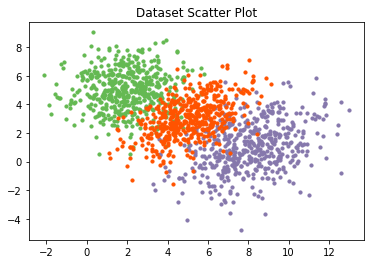

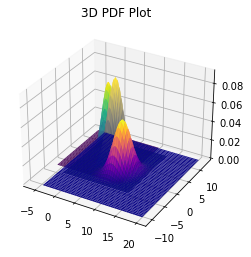

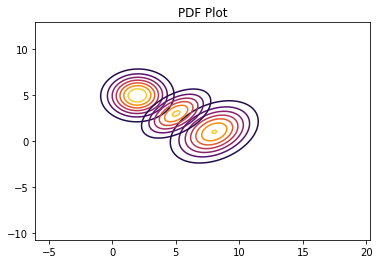

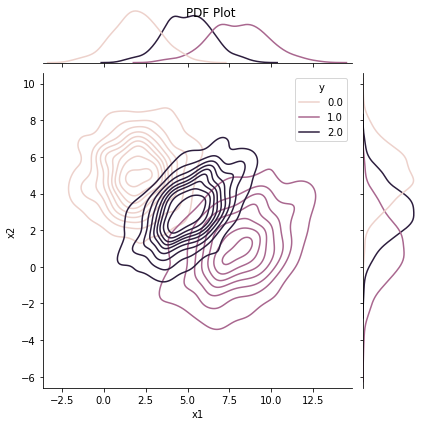

In [5]:
mean_1_class_1 = [2, 5]
covariance_1_class_1 = np.array([[2, 0], 
                                 [0, 2]])
mean_1_class_2 = [8, 1]
covariance_1_class_2 = np.array([[3, 1], 
                                 [1, 3]])
mean_1_class_3 = [5, 3]
covariance_1_class_3 = np.array([[2, 1], 
                                 [1, 2]])

mean_1 = []
mean_1.append(mean_1_class_1)
mean_1.append(mean_1_class_2)
mean_1.append(mean_1_class_3)

covariance_1 = []
covariance_1.append(covariance_1_class_1)
covariance_1.append(covariance_1_class_2)
covariance_1.append(covariance_1_class_3)
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=False)
dataset.plot_dataset(dataset.x, dataset.y)
dataset.plot_pdf(dataset.x, dataset.y)

# Histogram

In [3]:
class Histogram():
    def __init__(self, x_train, h):
        """
        x is the x_train
        h is the bin
        """
        self.bin = h
        self.x_train = x_train
        self.x1_train = x_train[:, 0]
        self.x2_train = x_train[:, 1]
        self.x1_train_min = self.x1_train.min()
        self.x1_train_max = self.x1_train.max()
        self.x2_train_min = self.x2_train.min()
        self.x2_train_max = self.x2_train.max()

        # create x1 & x2 points of histogram
        self.x1_train_points = np.arange(self.x1_train_min, self.x1_train_max, self.bin)
        self.x2_train_points = np.arange(self.x2_train_min, self.x2_train_max, self.bin)
        self.x_train_hists, self.x1_train_points, self.x2_train_points = np.histogram2d(self.x1_train, self.x2_train, bins=(self.x1_train_points, self.x2_train_points))

    # find density probability for (x1, x2)
    def probability_density_fn(self, new_x1, new_x2):
        n = self.x_train.shape[0]                                           # num of all data samples
        for i, x1 in enumerate(self.x1_train_points):
            if new_x1 < x1:
                for j, x2 in enumerate(self.x2_train_points):
                    if new_x2 < x2:
                        num_smaples = self.x_train_hists[i,j]               # num of samples in the given interval:k
                        return 1/n * (num_smaples / (self.bin ** 2))
    
    def plot_true_pdf(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        xpos, ypos = np.meshgrid(self.x1_train_points[:-1] + 0.25, self.x2_train_points[:-1] + 0.25, indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0
        dx = dy = 0.5 * np.ones_like(zpos)
        dz = self.x_train_hists.ravel()

        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

        plt.show()

        plt.hist2d(self.x1_train, self.x2_train,  cmap='Blues')
        cb = plt.colorbar()
        cb.set_label('counts in bin')

        plt.show()

    def plot_density_estimated_pdf(self, x_test):
        x1_test = x_test[:, 0]
        x2_test = x_test[:, 1]
        X1_TEST, X2_TEST = np.meshgrid(x1_test, x2_test)
        pdf = np.zeros(X1_TEST.shape)
        
        for i in range(X1_TEST.shape[0]):
            for j in range(X2_TEST.shape[0]):
                _pdf = self.probability_density_fn(X1_TEST[i,j], X2_TEST[i,j])
                pdf[i,j] = _pdf

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X1_TEST, X2_TEST, pdf)
        plt.show()


## Create dataset

In [6]:
h1, h2, h3 = 0.09, 0.3, 0.6
dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=True, test_size=0.2)

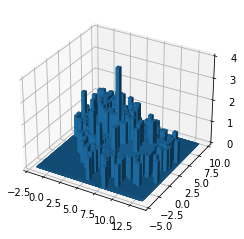

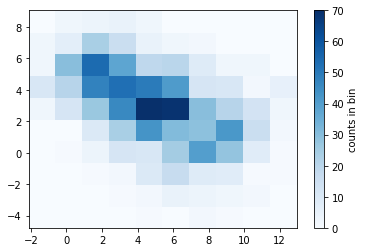

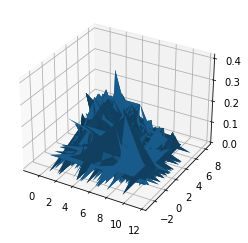

In [36]:
histogram = Histogram(dataset.x_train, h1)
histogram.plot_true_pdf()
histogram.plot_density_estimated_pdf(dataset.x_test)

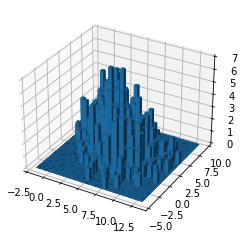

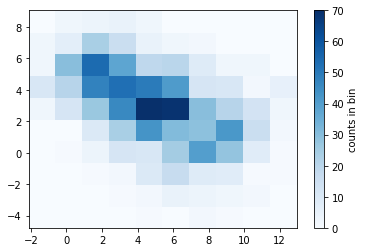

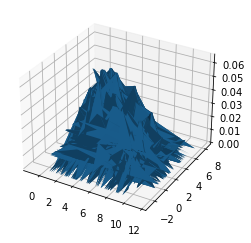

In [37]:
# dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=True, test_size=0.2)

histogram = Histogram(dataset.x_train, h2)
histogram.plot_true_pdf()
histogram.plot_density_estimated_pdf(dataset.x_test)

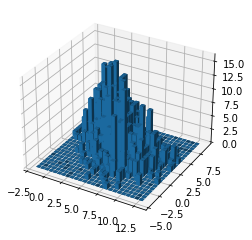

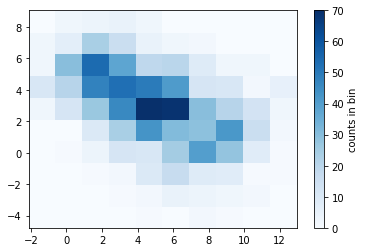

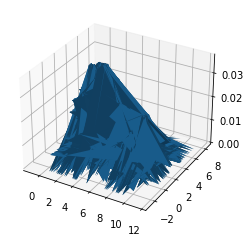

In [38]:
# dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=True, test_size=0.2)

histogram = Histogram(dataset.x_train, h3)
histogram.plot_true_pdf()
histogram.plot_density_estimated_pdf(dataset.x_test)